In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv("/content/drive/MyDrive/DatasetMedication.csv")

df.head()

,Gender,Age,Pain Intensity,Swelling,Diab,Hypertensive,Cardiac,Liver Transplant,Kidney Transplant,Drugs
0,male,40,severe,Y,N,Y,Y,N,N,DrugB
1,female,35,mild,N,N,Y,N,N,N,DrugA
2,male,42,normal,N,Y,Y,N,N,N,DrugA
3,male,15,normal,N,N,N,N,N,N,DrugC
4,female,34,normal,N,N,N,N,N,N,DrugC


In [85]:
print("The dataset consists of {} patients and {} features.".format(df.shape[0], df.shape[1]))

The dataset consists of 40 patients and 10 features.


In [90]:
X = df[['Gender', 'Age', 'Pain Intensity', 'Swelling', 'Diab', 'Hypertensive', 'Cardiac', 'Liver Transplant', 'Kidney Transplant']].values
y = df['Drugs'].values
print("Independent variable matrix:\n{}\n\n Dependent variable matrix:\n{}".format(X[:3], y[:3]))

Independent variable matrix:
[['male' 40 'severe ' 'Y' 'N' 'Y' 'Y' 'N' 'N']
 ['female' 35 'mild ' 'N' 'N' 'Y' 'N' 'N' 'N']
 ['male' 42 'normal' 'N' 'Y' 'Y' 'N' 'N' 'N']]

 Dependent variable matrix:
['DrugB' 'DrugA' 'DrugA']


In [101]:
from sklearn.preprocessing import LabelEncoder

# Read the data into a pandas DataFrame
df = pd.DataFrame(X, columns=['Gender', 'Age', 'Pain Intensity', 'Swelling', 'Diab', 'Hypertensive', 'Cardiac', 'Liver Transplant', 'Kidney Transplant'])

# Remove extra white spaces from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


# Convert values to lowercase for the 'Swelling', 'Diab', 'Hypertensive', 'Cardiac', 'Liver Transplant', and 'Drugs' columns
lowercase_columns = ['Swelling', 'Diab', 'Hypertensive', 'Cardiac', 'Liver Transplant', 'Kidney Transplant']
for col in lowercase_columns:
    df[col] = df[col].str.lower()

# Apply label encoding
for col in ['Gender', 'Pain Intensity', 'Swelling', 'Diab', 'Hypertensive', 'Cardiac', 'Liver Transplant', 'Kidney Transplant']:
    converter = LabelEncoder()
    df[col] = converter.fit_transform(df[col])


print("Transformed dataset:\n{}".format(df[:3]))

Transformed dataset:
   Gender  Age  Pain Intensity  Swelling  Diab  Hypertensive  Cardiac  \
0       1   40               2         1     0             1        1   
1       0   35               0         0     0             1        0   
2       1   42               1         0     1             1        0   

   Liver Transplant  Kidney Transplant  
0                 0                  0  
1                 0                  0  
2                 0                  0  


Since there are non-numerical values, we must convert them before training the model with them.

In [92]:
from sklearn.model_selection import train_test_split
training_X, test_X, training_y, test_y = sklearn.model_selection.train_test_split(df, y, test_size=0.25)

print("Training data consists of {} patients having {} features.".format(training_X.shape[0], training_X.shape[1]))
print("Test data consists of {} patients having 5 features.".format(test_X.shape[0]))

Training data consists of 30 patients having 9 features.
Test data consists of 10 patients having 5 features.


In [111]:
from sklearn.tree import DecisionTreeClassifier

model = sklearn.tree.DecisionTreeClassifier(criterion="entropy", max_depth=40)
model.fit(training_X, training_y)

predictions = model.predict([[0, 40, 2, 0, 0, 0, 1, 0, 0]])

#Let's see if our predictions are true:
print("Real labels: {}\nPredicted labels: {}".format(test_y[:4], predictions[:4]))

Real labels: ['DrugA' 'DrugC' 'DrugC' 'DrugA']
Predicted labels: ['DrugC']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [105]:
import pickle

# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [99]:
from sklearn import metrics
print("Accuracy of our model: %.2f" %metrics.accuracy_score(test_y, predictions))

Accuracy of our model: 0.90


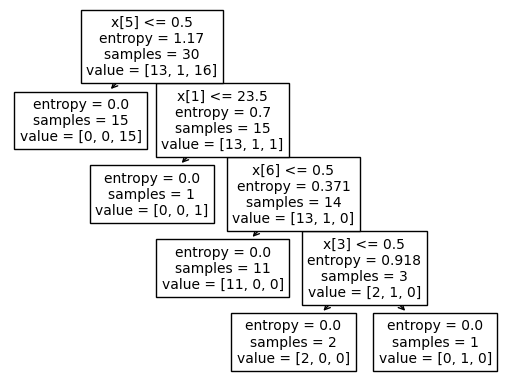

In [100]:
sklearn.tree.plot_tree(model)
plt.show()